### Your name:

<pre> Ashish Gupta</pre>

### Collaborators:

<pre>Formed a study group with Isaac Aktam and Konrad Korzeniewski</pre>


In [6]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dimesionality Reduction

Q. What is the curse of dimensionality?

The curse of dimentionality refers to the problems arising in a high dimentional space. In Machine learning, a randomly sampled high dimentional vector is generally very sparse. This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, PCA can be used to significantly reduce the dimentionality of the datasets - even if they are highly non linear. However PCA is only useful in eliminating the useless dimensions, however if we attempt PCA on the dimensions that are not useless, then reducing the dimensionality will lose too much information.

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

A Dimentionality reduction algorithm (Eg. PCA) works well if it eliminates a lot of dimensions from the dataset without loosing too much information. One way to measure this is to apply a reverse transformation and measure the reconstruction error. However the reverse transformation may not be provided by every other dimentionality reduction algorithm. we may also use the dimentionality reduction as a preprocessing step before implementing another machine learning algorthm. This way we can measure the effect / performance of the second algorithm - having the effect of dimentionality reduction to the model / algorithm, which doesn't applies the dimentionality reduction. if the dimentionality reduction did not loose too much information, then the second algorithm should perform just as well as when using the first algorithm.

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="C:\\Users\\Owner\\Desktop\\datasets\\MNIST")

In [7]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [8]:
#Now train the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier(random_state=42)

In [10]:
#Capture the time it takes to train the Random Forest on the training set

import time
t0 = time.time()
Random_Forest_Classifier.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 5.37s


In [13]:
#Get the accuracy score for the random forest classifier - by predicting on the test set.

from sklearn.metrics import accuracy_score
y_pred = Random_Forest_Classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.94550000000000001

Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_training_X = pca.fit_transform(X_train)

In [18]:
Random_Forest_Classifier_2 = RandomForestClassifier(random_state=42)
t0 = time.time()
Random_Forest_Classifier_2.fit(pca_training_X, y_train)
t1 = time.time()

In [19]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 14.07s


We can see that training took 9 more seconds (more slower) in dimentionality reduction. Thus dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.

In [20]:
#lets check the accuracy on the test set

pca_X_test = pca.transform(X_test)
y_pred = Random_Forest_Classifier_2.predict(pca_X_test)
accuracy_score(y_test, y_pred)

0.89080000000000004

It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.

In [23]:
#Let's see if it helps when using softmax regression

from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
Logistic_Regression.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 24.51s


In [24]:
# Check the accuracy score, by predicting on the test set
y_pred = Logistic_Regression.predict(X_test)
accuracy_score(y_test, y_pred)

0.92520000000000002

Okay, so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [25]:
Logistic_Regression_2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
Logistic_Regression_2.fit(pca_training_X, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 10.31s


In [28]:
y_pred = Logistic_Regression_2.predict(pca_X_test)
accuracy_score(y_test, y_pred)

0.91979999999999995

Well the accuracy on the test set is close to the training set, But Training on the PCA with a Logistic Regression provides some amount of a speedup. thats a very slight drop in performance, which might be a reasonable price to pay for a 4× speedup

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="C:\\Users\\Owner\\Desktop\\datasets\\MNIST")

In [3]:
import numpy as np
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [4]:
#Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, verbose = 2)
TSNE_X = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.862s...
[t-SNE] Computed neighbors for 10000 samples in 157.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 428.910557
[t-SNE] Computed conditional probabilities in 1.602s
[t-SNE] Iteration 50: error = 97.6459503, gradient norm = 0.0008205 (50 iterations in 25.709s)
[t-SN

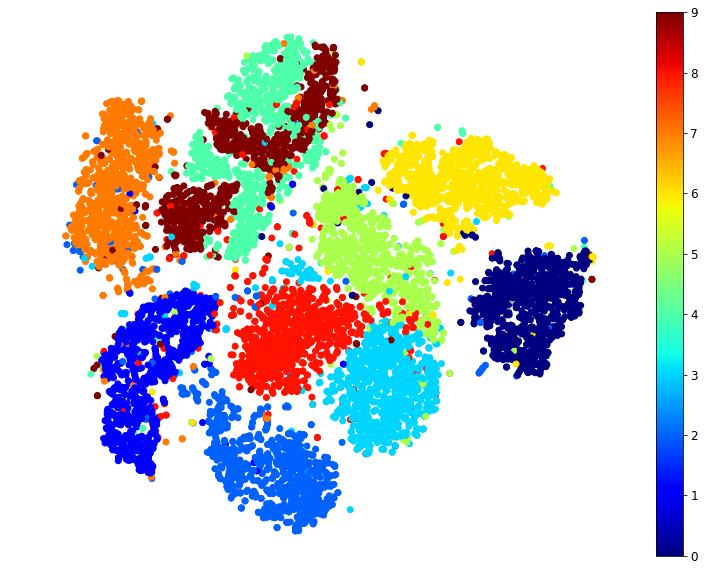

In [7]:
plt.figure(figsize=(13,10))
plt.scatter(TSNE_X[:, 0], TSNE_X[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [8]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

Let's focus on digits 2, 3 and 5, which seem to overlap a lot.

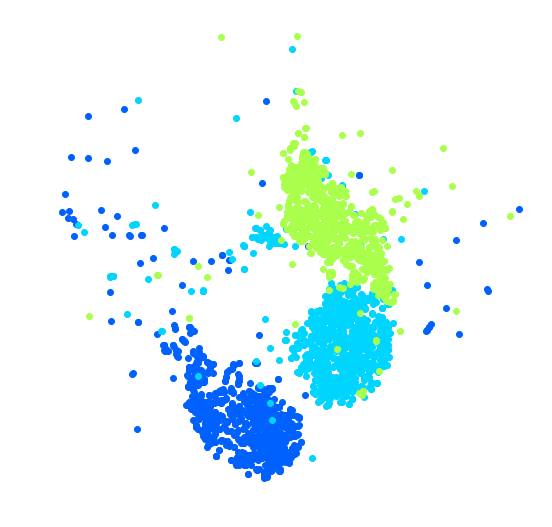

In [14]:
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(TSNE_X[y == digit, 0], TSNE_X[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 3 digits:

In [12]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

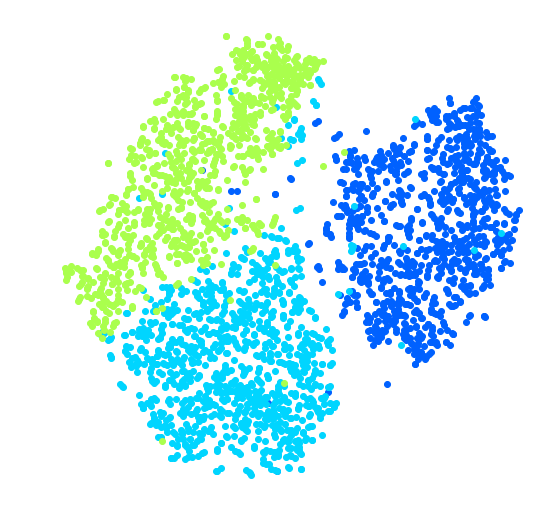

In [13]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now.

Let's try with the digit images:

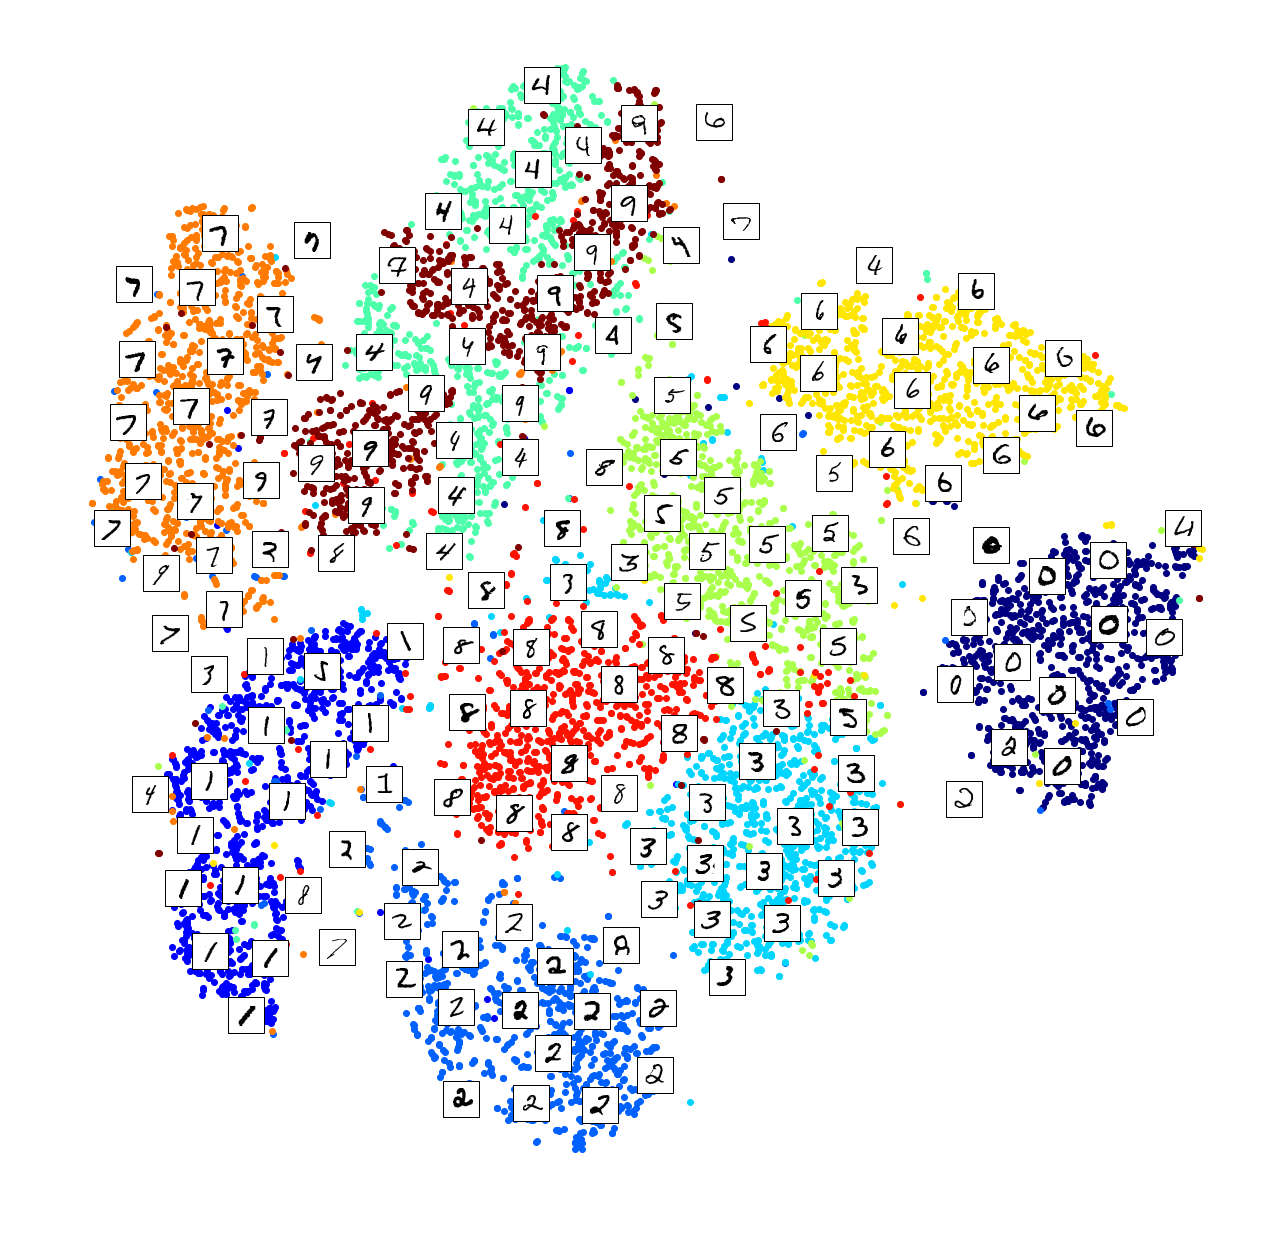

In [15]:
plot_digits(TSNE_X, y, images=X, figsize=(22, 22))

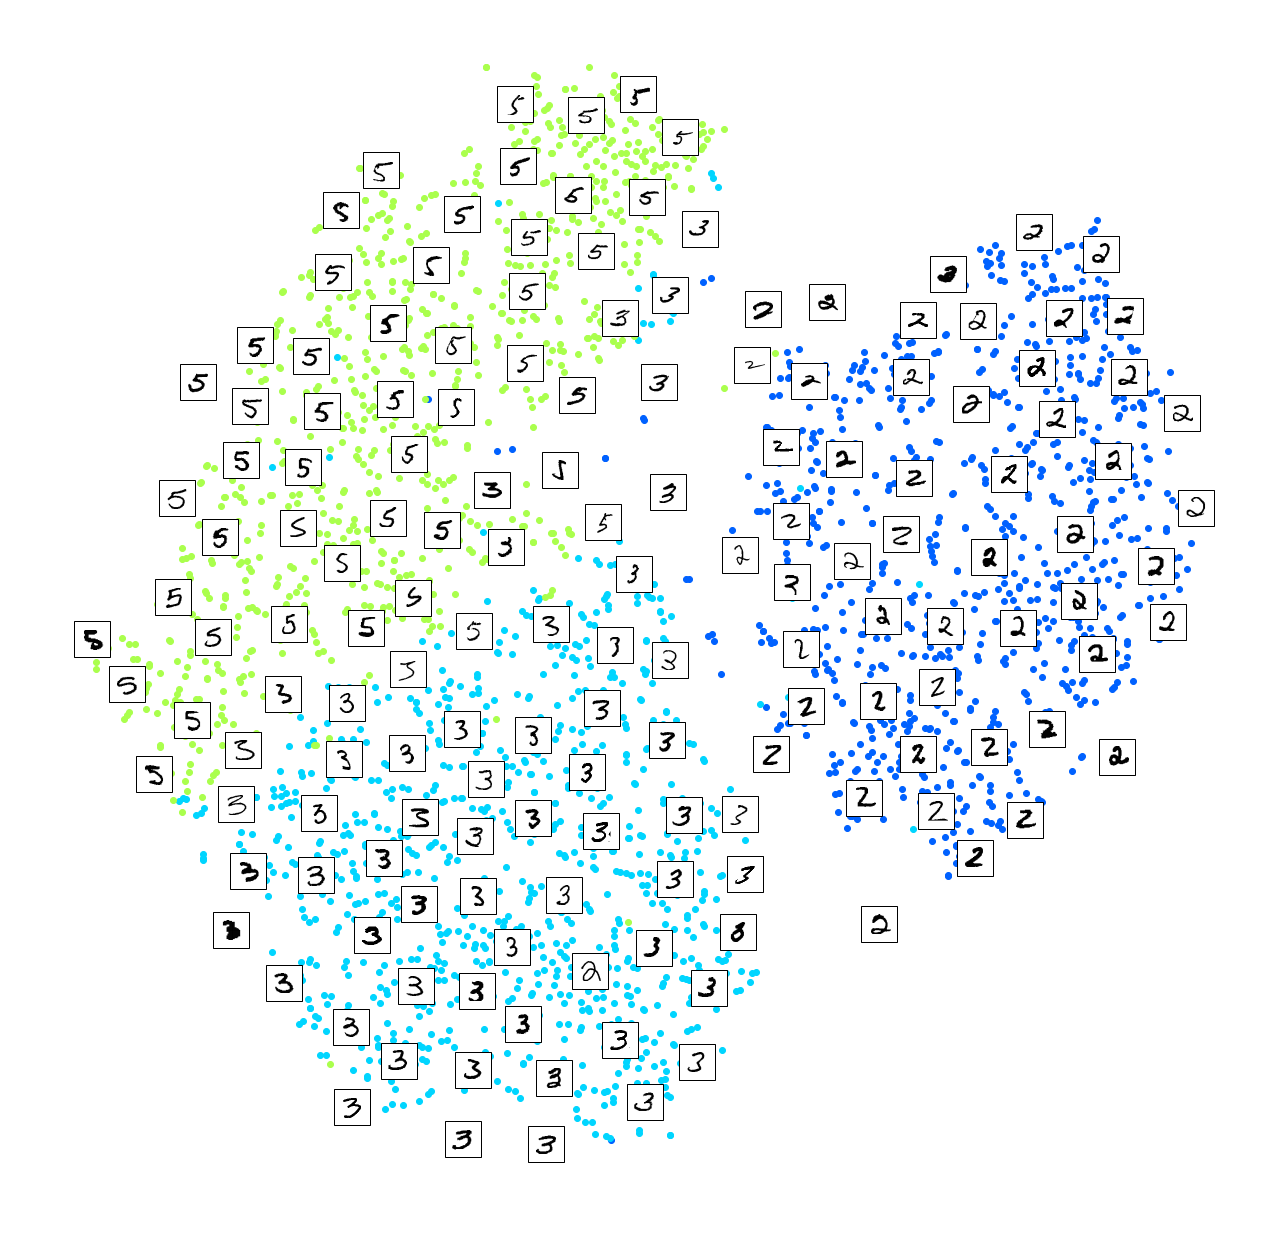

In [16]:
# Now lets see how 2, 3 and 5 looks like

plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

*Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.*

Let's start with PCA. We will also time how long it takes:

PCA took 0.9s.


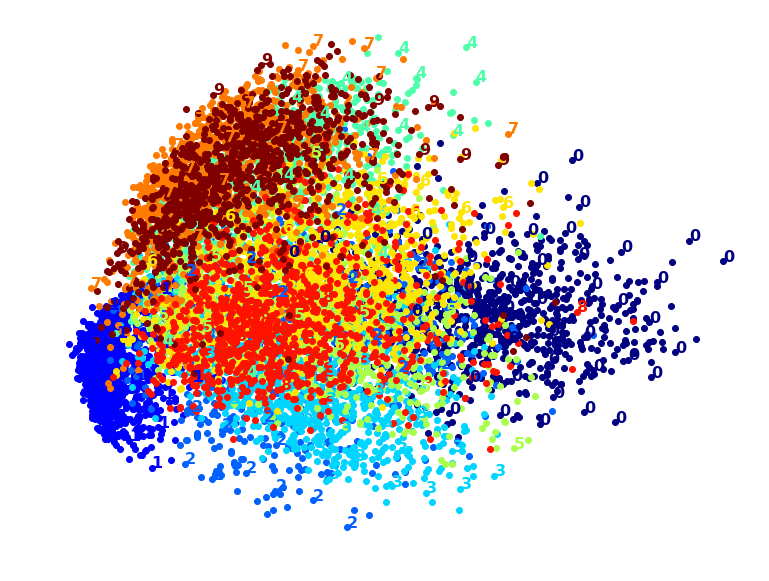

In [17]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE took 192.4s.


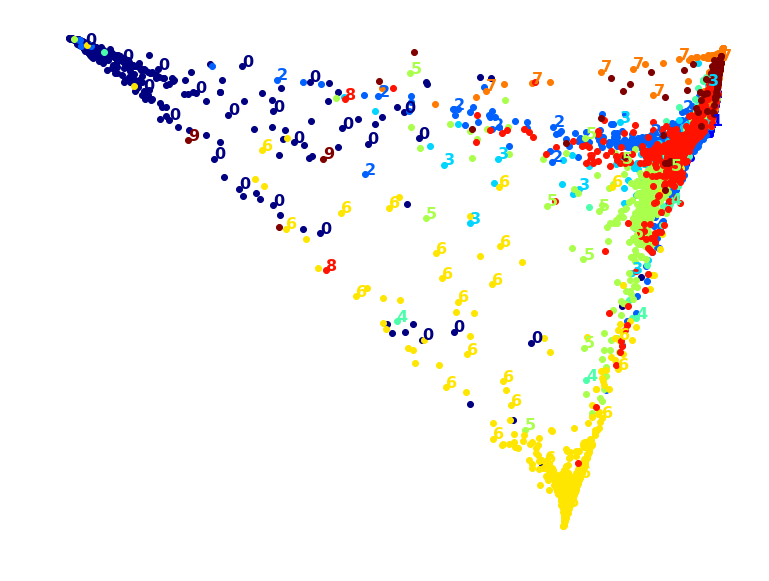

In [18]:
#LLE

from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 67.4s.


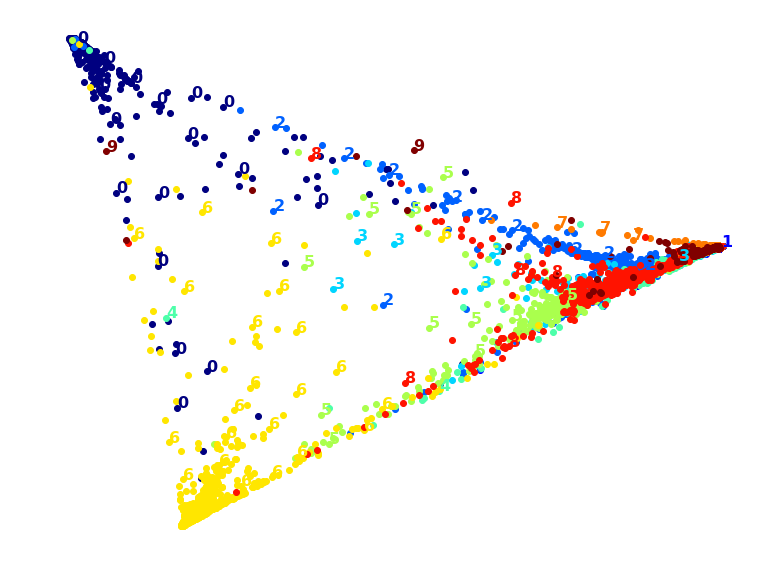

In [19]:
# lets do PCA and LLE in a pipeline

from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

The result is more or less the same, but this time it was almost 4× faster.

MDS took 262.6s (on just 2,000 MNIST images instead of 10,000).


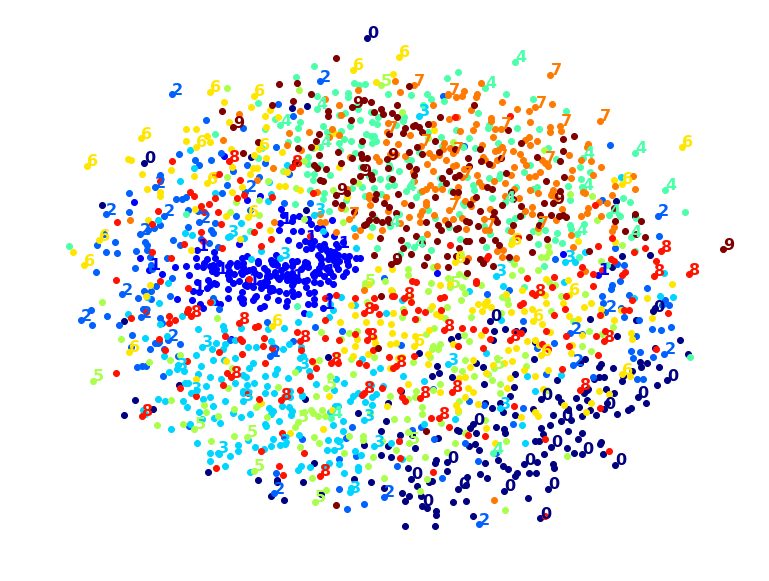

In [20]:
#lets try MDS on 2000 instances 

from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

MDS graph doesn't looks great, lets put PCA before MDS in a pipeline.

PCA+MDS took 281.9s (on 2,000 MNIST images).


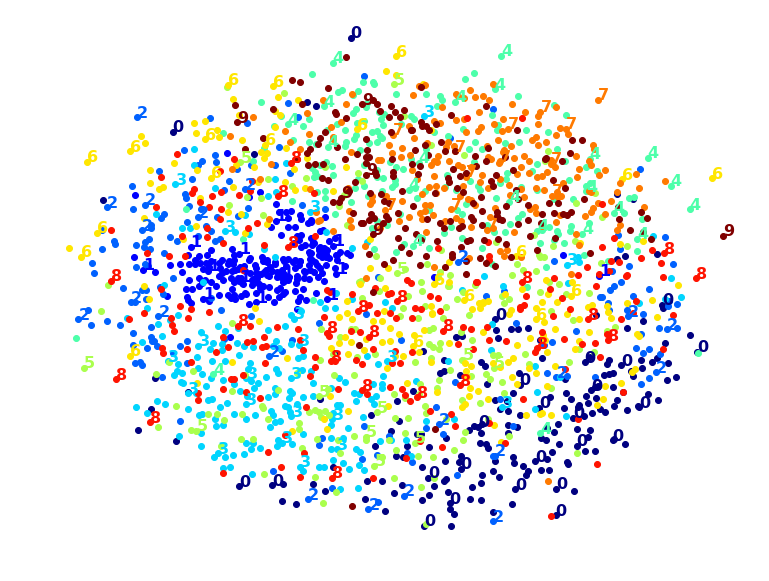

In [21]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

C:\Users\Owner\Anaconda3.5\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.3s.


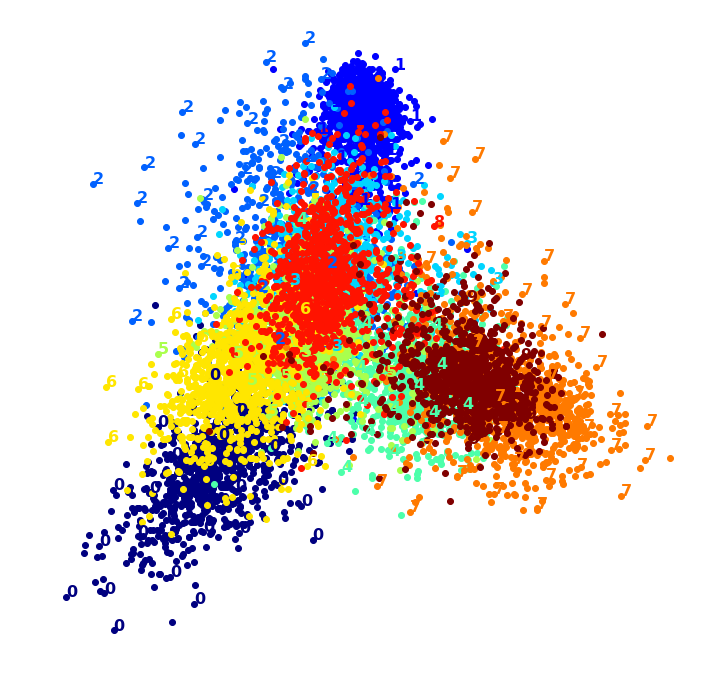

In [22]:
#lets try LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

its clear that TSNA is a clear winner. Lets time the TSNE

t-SNE took 626.4s.


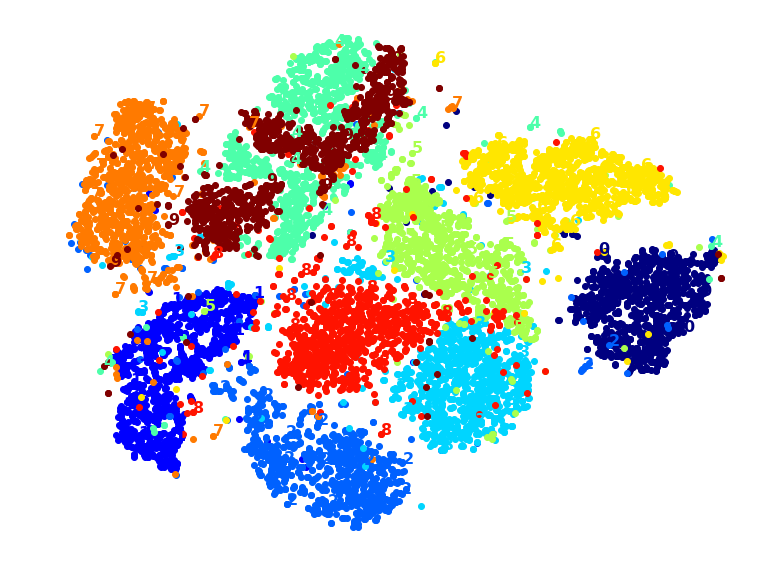

In [23]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

PCA+t-SNE took 513.3s.


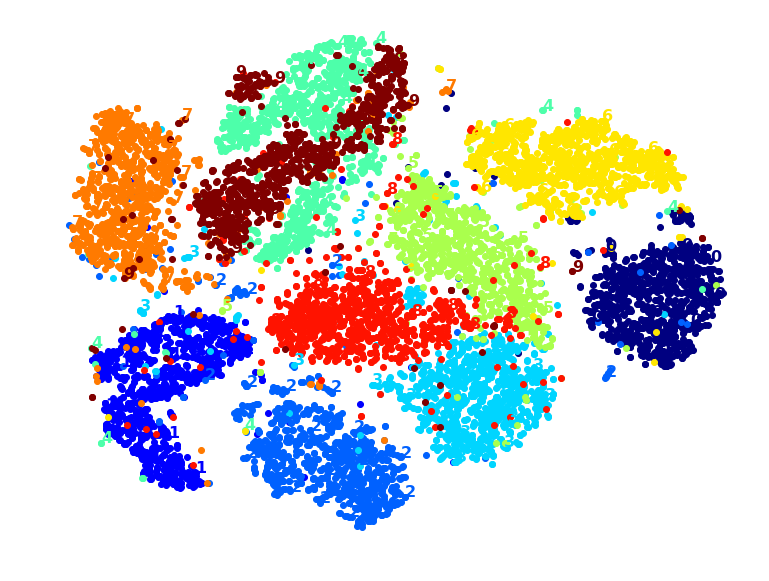

In [24]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

Yes, PCA roughly gave us a 25% speedup, without damaging the result. Lets try the digit images with PCA + TSNE

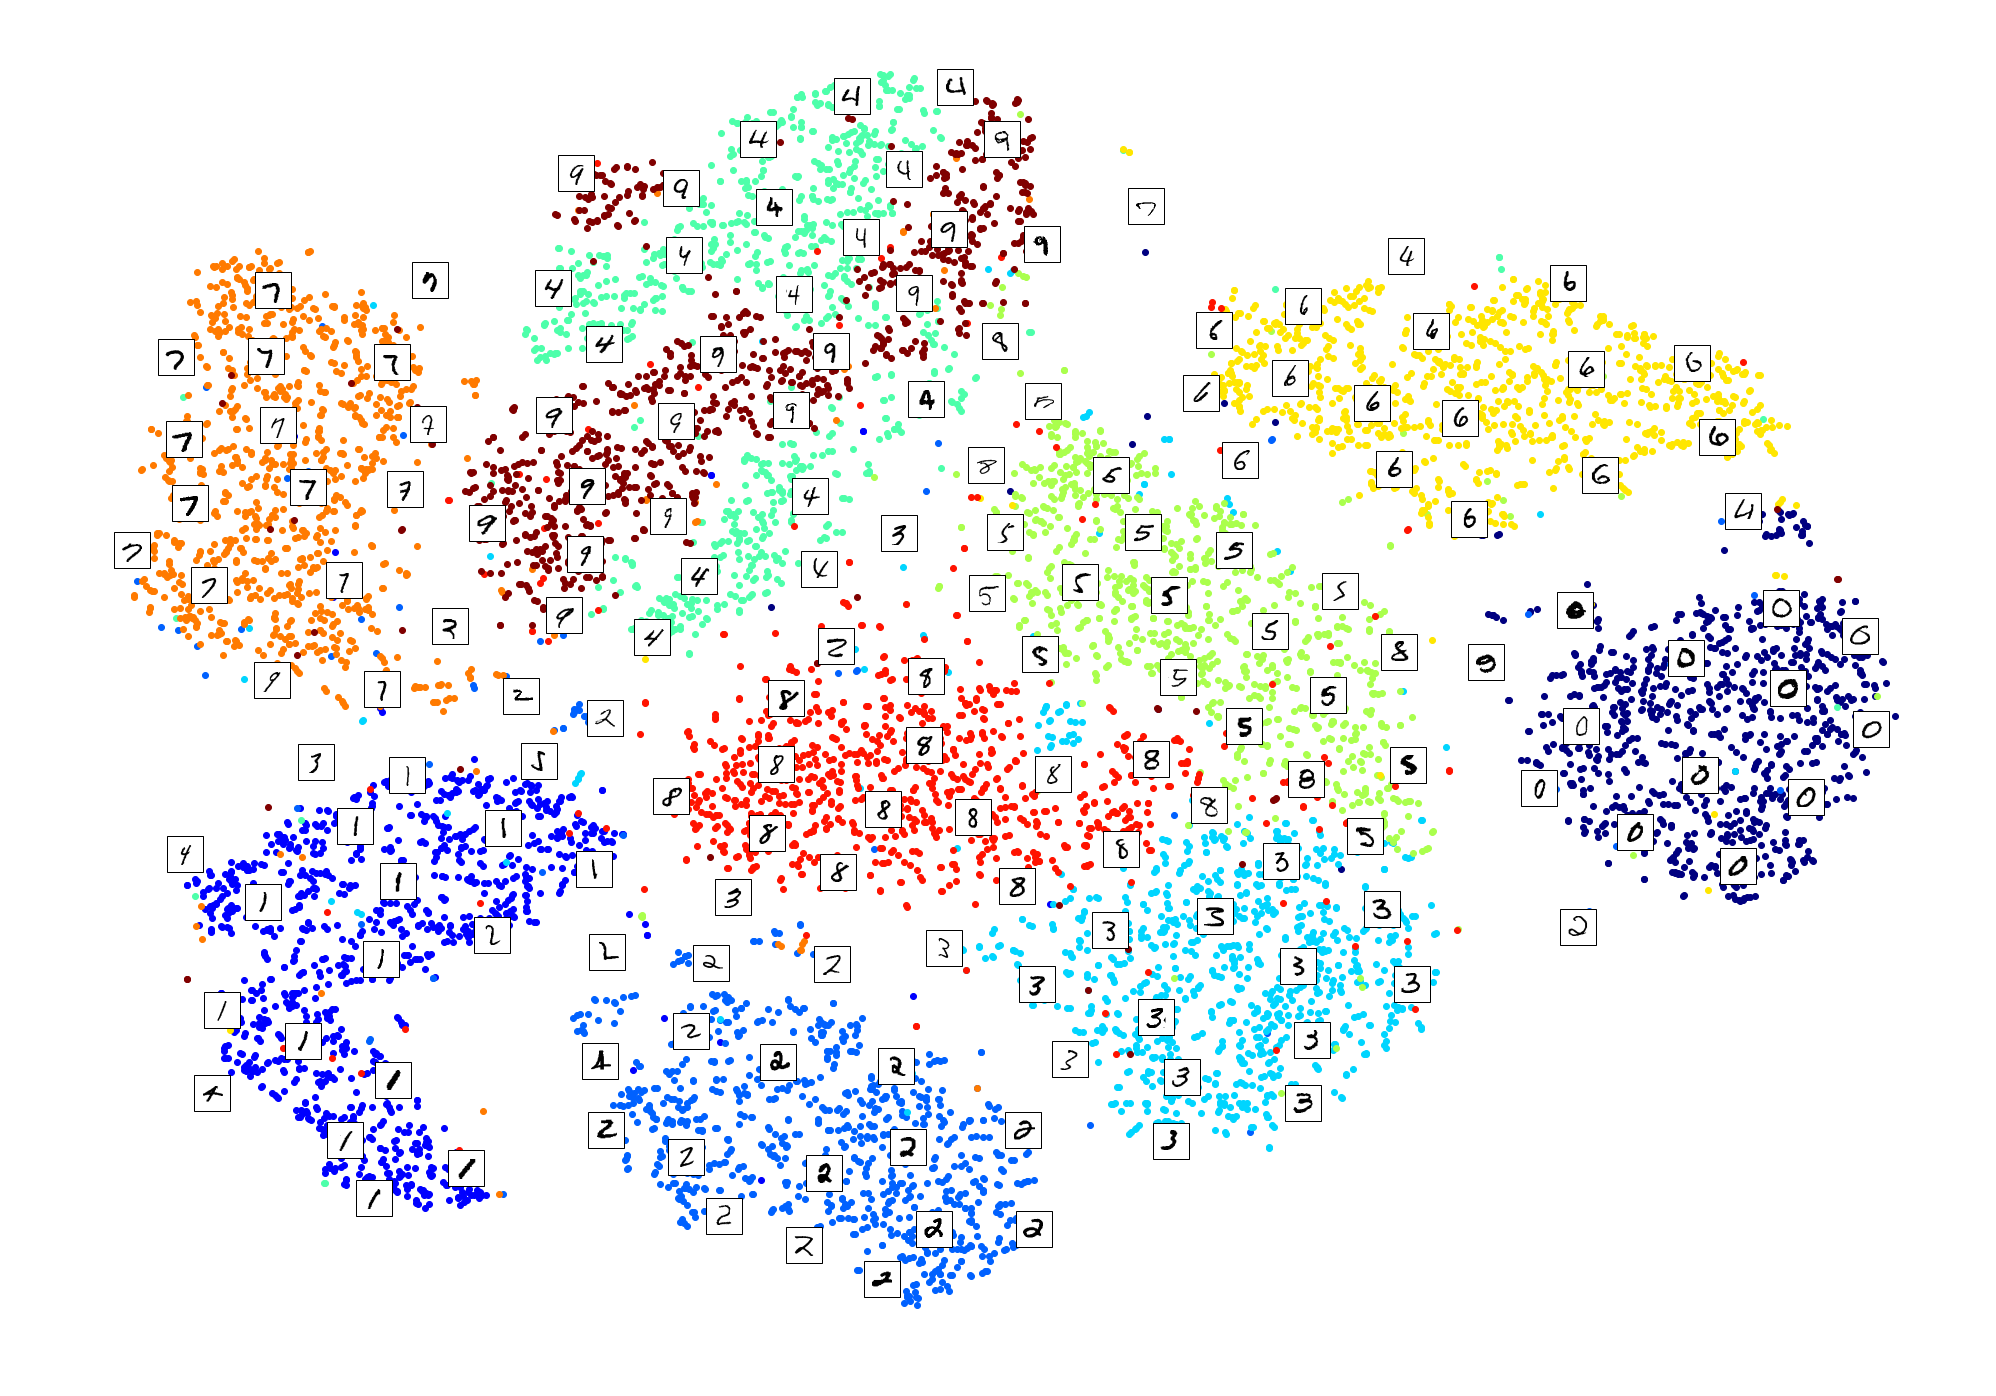

In [25]:
plot_digits(X_pca_tsne_reduced, y, images=X, figsize=(35, 25))
plt.show()

[Optional] Read
https://marckhoury.github.io/counterintuitive-properties-of-high-dimensional-space/

Summary your most interesting finding

1) The size of the radius of the inner sphere is growing as the dimension increases because the distance to the corner increases while the radius of the corner sphere remains constant. The radius of the inner sphere is growing at a rate of (SQRT(d)/2 - 1/2). This is pretty cool. So, let's work with 2 dimensions. The radius of the inner sphere is SQRT(2)/2 - 1/2 while the radius of the outside sphere is 1/2. Let's
move to 3 dimensions. The radius of the inner spehere is SQRT(3)/2 - 1/2 (= 0.366025404) while the radius of the outside sphere is 1/2. Now,
let's move to 4 dimensions. The radius of the inner spehere is SQRT(4)/2 - 1/2 (= 0.5) while the radius of the outside sphere is 1/2. This
is getting interesting. Let's move to 5 dimensions. The radius of the inner spehere is SQRT(4)/2 - 1/2 (= 0.618033989) while the radius of the outside sphere is 1/2. Wow, this is strange! A radius of the inner sphere is greater than that of the outside sphere at the edge. Strange things
happen in upper dimensions. Therefore, in dimensions two and three, the sphere is strictly inside the cube, as we’ve seen in the figures above. However in four dimensions something very interesting happens. The radius of the inner sphere is exactly 1/2, which is just large enough for the inner sphere to touch the sides of the cube! In five dimensions, the radius of the inner sphere is 
0.618034, and the sphere starts poking outside of the cube! By ten dimensions, the radius is 1.08114 and the sphere is poking very far outside of the cube!

2) Next, a d-dimensional sphere with radius 1 has volume 0 when d is greater than 6. Weird, right? The volume of the unit d-sphere goes to 0 as 
d grows! A high dimensional unit sphere encloses almost no volume! The volume increases from dimensions one to five, but begins decreasing rapidly toward 0 after dimension six.

3) Concentration of Measure. In 2d, to capture 99% area of the uni sphere, we need a pretty big band. But, as d increases, the the size of the band decreases dramatically. In very high dimensional space nearly all of the surface area of the sphere lies a very small distance away from the equator! Remember, that a sphere must a satisfy a function where sum of the square of the coordinates equals 1. Therefore, as the number
of dimensions increases, the value of each of the coordinates gets closer to 0. 

4) Kissing Numbers. Consider a red unit circle in 2d. The kissing number of that red unit circle is 6 since there are 6 non-overlaping circles
that touch the red circle on all sides. The kissing number is the maximum number of non-overlapping blue circles that can simultaneously kiss the red circle. Blue circles have a unit radius. In 3d, the kissing number is 12. In fact, there are very few dimensions where we know the kissing number exactly. In most dimensions we only have an upper and lower bound on the kissing number, and these bounds can vary by as much as several thousand spheres! Isn't this rather interesting? Fantastic, I say fantastic it is! Man, I really want sushi.

Summary. In short, the kissing number in higher dimensions skyrockets and can't be precisely measured, the band to capture 99% of the data near the equator of the unit sphere shrinks significantly as d increases, volume of the unit sphere goes to 0 in higher dimensions, and the inner sphere located in unit square has an greater (and thus increasing radius) as d increases compared to the unit circles at the corners of the unit square.